In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from PIL import Image
from plot import make_plots

In [3]:
def plot_proportions(random=False):
    no_neither = []
    neither = []
    restricted = []
    alphas = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
    for alpha in alphas:
        alpha = str(alpha)
        if not random:
            results_dir = 'myresults/classification/resnet50/alpha_{}/'.format(alpha)
        else:
            results_dir = 'myresults/classification/resnet50_random/alpha_{}/'.format(alpha)
        df = pd.read_csv(results_dir + 'proportions_avg.csv')
        no_neither.append(df.loc[0, 'Shape Match Closer'])
        neither.append(df.loc[1, 'Shape Match Closer'])
        restricted.append(df.loc[2, 'Shape Match Closer'])
    
    plt.plot(alphas, no_neither, '-o', label='No Neither')
    plt.plot(alphas, neither, '-o', label='Neither')
    plt.plot(alphas, restricted, '-o', label='Restricted')
    plt.legend()
    plt.show()

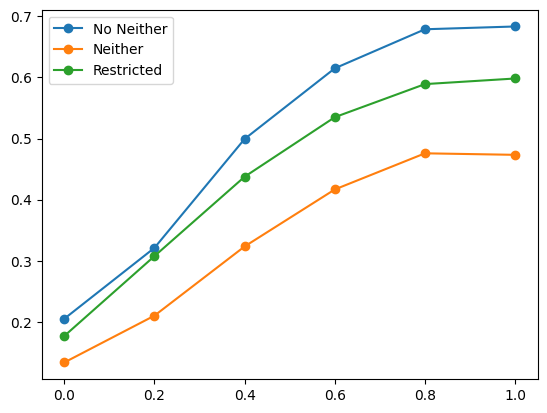

In [4]:
plot_proportions(random=False)

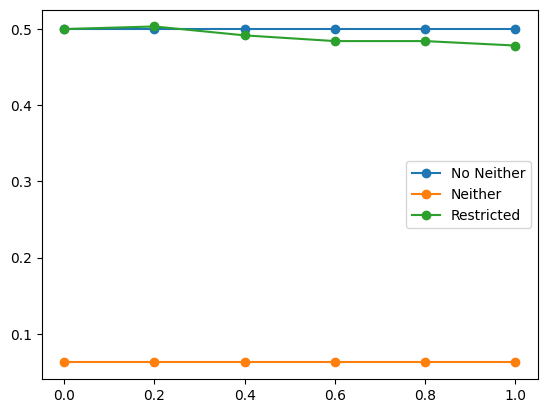

In [5]:
plot_proportions(random=True)